In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [204]:
df = pd.read_excel('ingresos.xlsx')

In [205]:
def limpiar_etl(df):
    def eliminar_nan():
        
        for j in df:
            lista_aux = []
            for i in df[j]:
                if pd.isna(i):
                    lista_aux.append(0)
                else:
                    lista_aux.append(i)

            df_nuevo = pd.DataFrame({j: lista_aux})
            df.drop(columns=[j])
            df[j] = df_nuevo[j]
            
    def modificar_tipo():
        for i in df['monto_recaudado']:
            i = float(i)
        for i in df['monto_estimado']:
            i = float(i)
        for i in df['ciclo']:
            i = int(i)
        for i in df['clase']:
            i = str(i)
    eliminar_nan()
    modificar_tipo()
limpiar_etl(df)

In [202]:
df.head(30)

,ciclo,periodo,tipo_recurso_clase,desc_tipo_recurso_clase,rubro,desc_rubro,tipo,costo_tipo_1,costo_tipo_2,costo_tipo_4,...,costo_tipo_7,desc_tipo,clase,desc_clase,concepto,desc_concepto,concepto_especifico,desc_concepto_esp,monto_estimado,monto_recaudado
0,2020,Primer Trimestre,1,Ingresos locales,1,Impuestos,1.3,100.0,0.0,0.0,...,0.0,"Impuestos sobre la producci√≥n, el consumo y l...",1.3.1,Sobre Espect√°culos P√∫blicos,0,0,0,0,1.188403e+08,3.829086e+07
1,2020,Primer Trimestre,1,Ingresos locales,1,Impuestos,1.3,100.0,0.0,0.0,...,0.0,"Impuestos sobre la producci√≥n, el consumo y l...",1.3.2,"Sobre Loter√≠as, Rifas, Sorteos y Concursos",0,0,0,0,1.299428e+08,1.317353e+08
2,2020,Primer Trimestre,1,Ingresos locales,1,Impuestos,1.3,100.0,0.0,0.0,...,0.0,"Impuestos sobre la producci√≥n, el consumo y l...",1.3.5,Por las Erogaciones en Juegos con Apuestas,0,0,0,0,5.675131e+07,5.559003e+07
3,2020,Primer Trimestre,1,Ingresos locales,1,Impuestos,1.7,100.0,0.0,0.0,...,0.0,Accesorios de los Impuestos,1.7.1,Accesorios de los Impuestos,0,0,0,0,1.106723e+08,1.376575e+08
4,2020,Primer Trimestre,1,Ingresos locales,4,Derechos,4.1,0.0,0.0,45.0,...,0.0,"Derechos por el uso, goce, aprovechamiento o e...",4.1.3,Por el Uso o Aprovechamiento de Inmuebles,0,0,0,0,3.918783e+07,3.450881e+07
5,2020,Primer Trimestre,1,Ingresos locales,4,Derechos,4.3,0.0,0.0,45.0,...,0.0,Derechos por prestaci√≥n de servicios,4.3.4,Por la Prestaci√≥n de Servicios del Registro P...,0,0,0,0,3.197487e+08,2.980908e+08
6,2020,Primer Trimestre,1,Ingresos locales,4,Derechos,4.3,0.0,0.0,45.0,...,0.0,Derechos por prestaci√≥n de servicios,4.3.7,Por los Servicios de Alineamiento y Se√±alamie...,0,0,0,0,1.307996e+07,1.355802e+07
7,2020,Primer Trimestre,1,Ingresos locales,5,Productos,5.1,0.0,0.0,0.0,...,0.0,Productos,5.1.1,Productos derivados del uso y aprovechamiento ...,5.1.1.1,Por la prestaci√≥n de servicios que correspond...,5.1.1.1.1,0,1.432431e+09,2.094270e+09
8,2020,Primer Trimestre,1,Ingresos locales,5,Productos,5.1,0.0,0.0,0.0,...,0.0,Productos,5.1.1,Productos derivados del uso y aprovechamiento ...,5.1.1.1,Por la prestaci√≥n de servicios que correspond...,5.1.1.1.2,0,9.955847e+08,8.725202e+08
9,2020,Primer Trimestre,1,Ingresos locales,5,Productos,5.1,0.0,0.0,0.0,...,0.0,Productos,5.1.1,Productos derivados del uso y aprovechamiento ...,5.1.1.1,Por la prestaci√≥n de servicios que correspond...,5.1.1.1.3,0,0.000000e+00,0.000000e+00


In [206]:
import sqlite3
class etl():
    def create_db(self):
        con = sqlite3.connect('tabla_ingresos.db')
        cursor = con.cursor()

        cursor.execute('''
            CREATE TABLE ingresos(
                ingresos_id INTEGER PRIMARY KEY,
                ciclo INTEGER,
                periodo VARCHAR(20),
                tipo_recurso_clase NUMBER(20),
                desc_tipo_recurso_clase VARCHAR(40),
                rubro INTEGER,
                desc_rubro VARCHAR(40),
                tipo FLOAT,
                costo_tipo_1 INTEGER,
                costo_tipo_2 INTEGER,
                costo_tipo_4 INTEGER,
                costo_tipo_5 INTEGER,
                costo_tipo_6 INTEGER,
                costo_tipo_7 INTEGER,
                desc_tipo VARCHAR2(90),
                clase VARCHAR(20),
                desc_clase VARCHAR2(90),
                concepto VARCHAR(20),
                desc_concepto VARCHAR2(90),
                concepto_especifico VARCHAR(20),
                desc_concepto_esp VARCHAR2(90),
                monto_estimado FLOAT,
                monto_recaudado FLOAT
            )
        ''')
        con.commit()
        cursor.close()
        
    def charge_file(self, df):
        lista = []
        for i in range(len(df)):
            lista_aux = []
            lista_aux.append(i)
            lista_aux.append(str(df['ciclo'][i]))
            lista_aux.append(str(df['periodo'][i]))
            lista_aux.append(str(df['tipo_recurso_clase'][i]))
            lista_aux.append(str(df['desc_tipo_recurso_clase'][i]))
            lista_aux.append(str(df['rubro'][i]))
            lista_aux.append(str(df['desc_rubro'][i]))
            lista_aux.append(str(df['tipo'][i]))
            lista_aux.append(str(df['costo_tipo_1'][i]))
            lista_aux.append(str(df['costo_tipo_2'][i]))
            lista_aux.append(str(df['costo_tipo_4'][i]))
            lista_aux.append(str(df['costo_tipo_5'][i]))
            lista_aux.append(str(df['costo_tipo_6'][i]))
            lista_aux.append(str(df['costo_tipo_7'][i]))
            lista_aux.append(str(df['desc_tipo'][i]))
            lista_aux.append(str(df['clase'][i]))
            lista_aux.append(str(df['desc_clase'][i]))
            lista_aux.append(str(df['concepto'][i]))
            lista_aux.append(str(df['desc_concepto'][i]))
            lista_aux.append(str(df['concepto_especifico'][i]))
            lista_aux.append(str(df['desc_concepto_esp'][i]))
            lista_aux.append(str(df['monto_estimado'][i]))
            lista_aux.append(str(df['monto_recaudado'][i]))
            lista.append(lista_aux)
        return tuple(lista)
    
    def charge_sql(self, lista):
        con = sqlite3.connect('tabla_ingresos.db')
        cursor = con.cursor()

        query = "INSERT INTO ingresos (ingresos_id, ciclo, periodo, tipo_recurso_clase, desc_tipo_recurso_clase, rubro, desc_rubro, tipo, costo_tipo_1, costo_tipo_2, costo_tipo_4, costo_tipo_5, costo_tipo_6, costo_tipo_7, desc_tipo, clase, desc_clase, concepto, desc_concepto, concepto_especifico, desc_concepto_esp, monto_estimado, monto_recaudado) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
        cursor.executemany(query, lista)
        con.commit()
        cursor.close()
    
    def comprobacion(self, inicio):
        con = sqlite3.connect('tabla_ingresos.db')
        cursor = con.cursor()

        cursor.execute("SELECT * FROM ingresos")
        rows = cursor.fetchall()
        con.commit()
        cursor.close()
        return (len(inicio) == len(rows))

In [207]:
etl1 = etl()
etl1.create_db()
carga = etl1.charge_file(df)
etl1.charge_sql(carga)
etl1.comprobacion(carga)

True

(array([4., 0., 0., 0., 3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

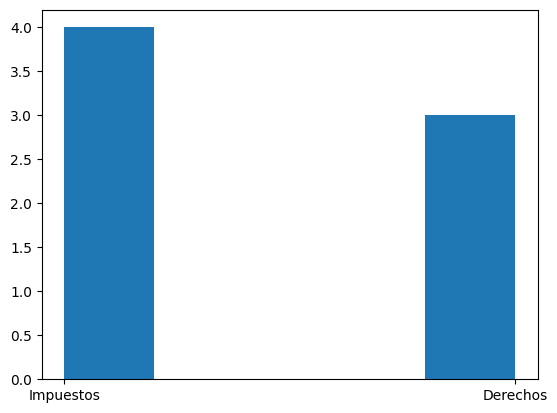

In [167]:
plt.hist(df['desc_rubro'][0:7], bins = 5)

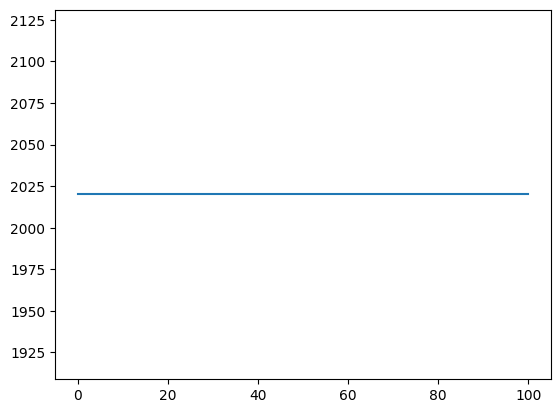

In [225]:
plt.plot(df['costo_tipo_1'][0:10],df['ciclo'][0:10])

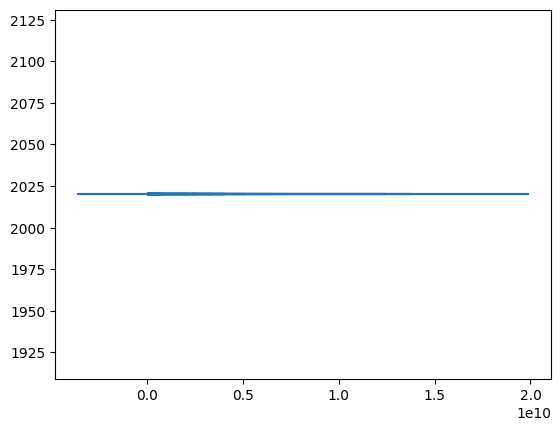

In [228]:
plt.plot(df['monto_recaudado'][0:100],df['ciclo'][0:100])